   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  
Linear Regression RMSE: 70031.42172263758
Decision Tree Regression RMSE: 69

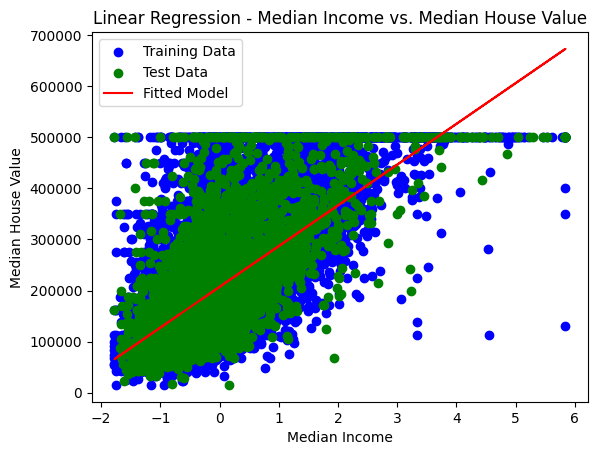

In [14]:
import pandas as pd

# Load the data
data = pd.read_csv("housing.csv", )

# Print first few rows of the data
print(data.head())

# Extract input (X) and output (Y) data
X = data.drop("median_house_value", axis=1)
Y = data["median_house_value"]
# Fill missing values with mean

X = X.fillna(X.mean(numeric_only=True))
# Convert categorical column to numerical data
X = pd.get_dummies(X, columns=["ocean_proximity"])
from sklearn.model_selection import train_test_split

# Split the data into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Standardize training and test datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Perform Linear Regression on training data
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Predict output for test dataset
Y_pred = linear_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Linear Regression RMSE:", rmse)
from sklearn.tree import DecisionTreeRegressor

# Perform Decision Tree Regression on training data
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, Y_train)

# Predict output for test dataset
Y_pred = dt_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Decision Tree Regression RMSE:", rmse)

from sklearn.ensemble import RandomForestRegressor

# Perform Random Forest Regression on training data
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)

# Predict output for test dataset
Y_pred = rf_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Random Forest Regression RMSE:", rmse)


import numpy as np
import matplotlib.pyplot as plt

# Extract median_income column
X_train_income = X_train[:, X.columns.get_loc("median_income")].reshape(-1, 1)
X_test_income = X_test[:, X.columns.get_loc("median_income")].reshape(-1, 1)

# Perform Linear Regression on median_income
linear_reg_income = LinearRegression()
linear_reg_income.fit(X_train_income, Y_train)

# Predict output for test dataset using median_income
Y_pred_income = linear_reg_income.predict(X_test_income)

# Plot the fitted model
plt.scatter(X_train_income, Y_train, color="blue", label="Training Data")
plt.scatter(X_test_income, Y_test, color="green", label="Test Data")
plt.plot(X_train_income, linear_reg_income.predict(X_train_income), color="red", label="Fitted Model")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression - Median Income vs. Median House Value")
plt.legend()
plt.show()
